In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

os.makedirs('assets', exist_ok=True)

ModuleNotFoundError: No module named 'sklearn'

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_processed = X_test.astype('float32').reshape(-1, 28, 28, 1) / 255.0
model = load_model('../models/cnn_mnist.h5')

In [22]:
predictions = model.predict(X_test_processed)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


Total misclassified examples: 86


FileNotFoundError: [Errno 2] No such file or directory: 'assets/misclassified.png'

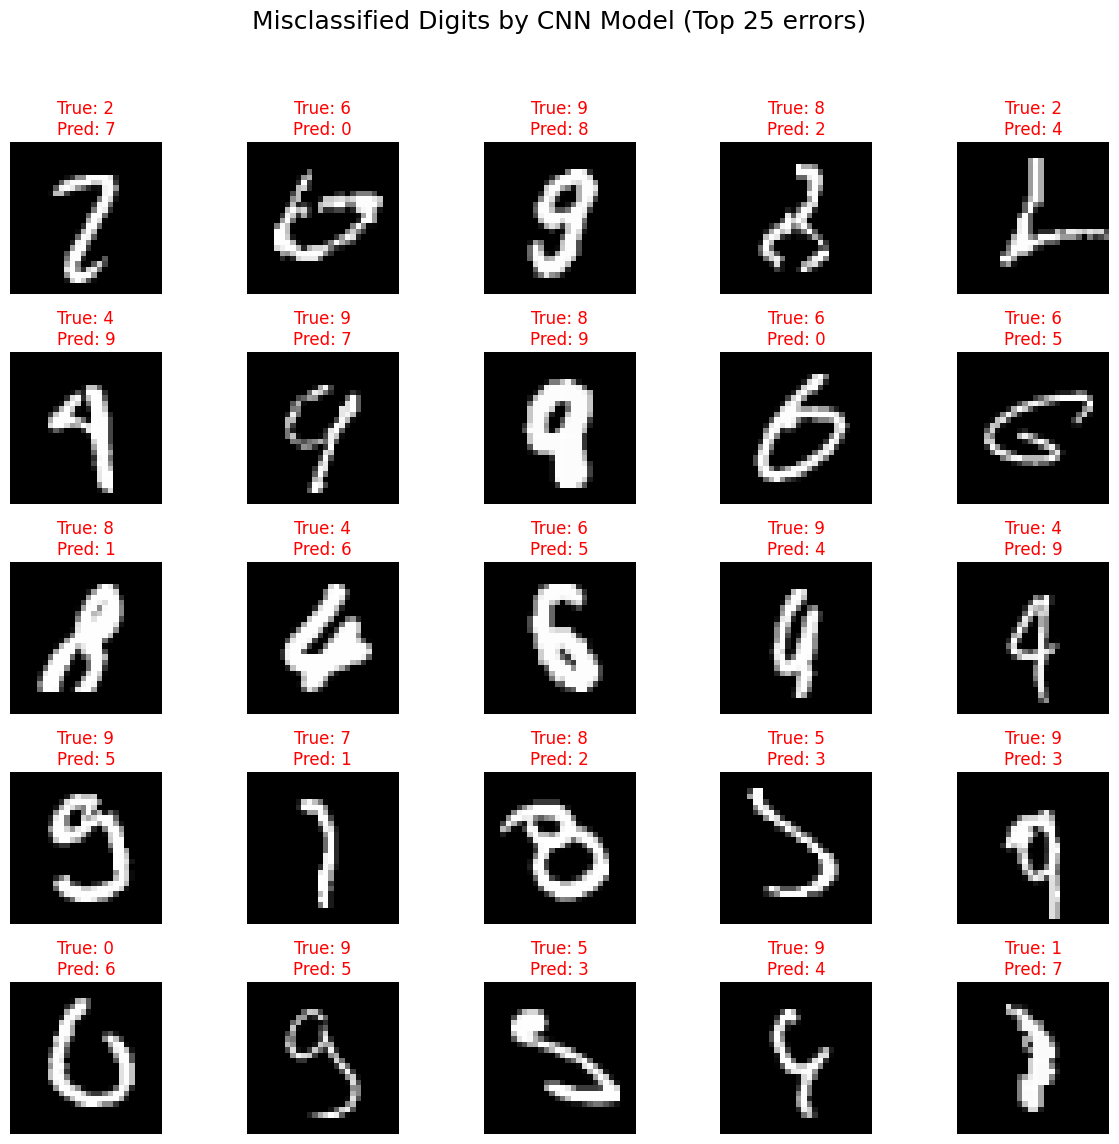

In [23]:
errors_indices = np.where(predicted_labels != y_test)[0]
num_errors = len(errors_indices)
print(f"Total misclassified examples: {num_errors}")

plt.figure(figsize=(12,12))
num_to_display = min(25, num_errors)
for i in range(num_to_display):
    idx = errors_indices[i]
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {predicted_labels[idx]}", color='red')
    plt.axis('off')
plt.suptitle(f"Misclassified Digits by CNN Model (Top {num_to_display} errors)", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('assets/misclassified.png')
plt.show()

In [24]:
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.tight_layout()
plt.savefig('assets/confusion_matrix.png')
plt.show()

NameError: name 'confusion_matrix' is not defined

In [ ]:
# Error Analysis
- Visualized misclassified digits and confusion matrix.
- Common confusions and ambiguous digits identified.